#  <font color='red'> Minimum distance classifier </font> 



In [1]:
from sklearn.datasets import load_digits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

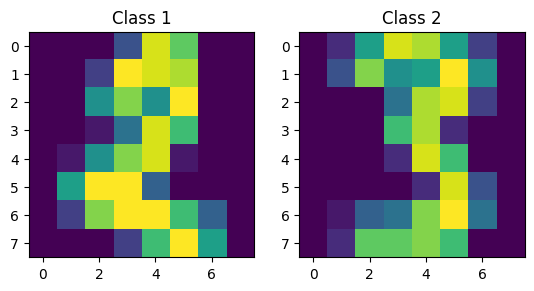

In [11]:
mnist = load_digits(n_class=10)
#print(mnist.keys())


# Change the line below to set the classes

# Try first with zeros and ones
# Change later to 2 and 3

zeros = (mnist.target==2)
ones = (mnist.target==3)

class1_images = mnist.images[zeros]
class2_images = mnist.images[ones]
fig,ax = plt.subplots(1,2)
s=ax[0].imshow(class1_images[0])
s=ax[0].set_title('Class 1')
s=ax[1].imshow(class2_images[1])
s=ax[1].set_title('Class 2')


## Compute the means of the classes and the std of the demeaned images

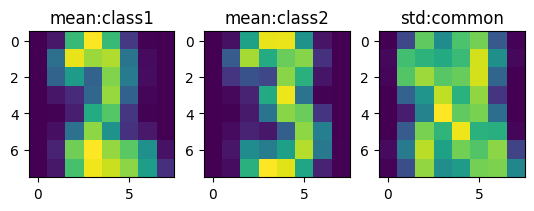

In [12]:
# Compute the means
mu1 = np.mean(class1_images,axis=0)
mu2 = np.mean(class2_images,axis=0)

# Create mean subtracted images
class1_demeaned = class1_images - mu1[None,]
class2_demeaned = class2_images - mu2[None,]

# Compute the combined covariance matrix, assuming it to be diagonal

class_combined_demeaned = np.concatenate((class1_demeaned,class2_demeaned),axis=0)
std = np.std(class_combined_demeaned,axis=0)

fig,ax = plt.subplots(1,3)
s=ax[0].imshow(mu1)
s=ax[0].set_title('mean:class1')
s=ax[1].imshow(mu2)
s=ax[1].set_title('mean:class2')

s=ax[2].imshow(std)
s=ax[2].set_title('std:common')

x = np.concatenate((class1_images,class2_images),axis=0)
class1_labels = np.full(x.shape[0], True)
class1_labels[0:class1_images.shape[0]]=False

## Evaluate the discriminant, assuming $\Sigma_1=\Sigma_2 = \mathbf I$


$$y(\mathbf x) = \underbrace{(\mu_2-\mu_1)^T}_{\mathbf w^T} (\mathbf x-\frac{\mu_1+\mu_2}{2})$$

which simplifies to 

$$y(\mathbf x) = \underbrace{(\mu_2-\mu_1)^T}_{\mathbf w^T} ~\mathbf x- \underbrace{\mathbf w^T\left(\frac{\mu_1+\mu_2}{2}\right)}_{w_0}$$


# misclassifications =  199


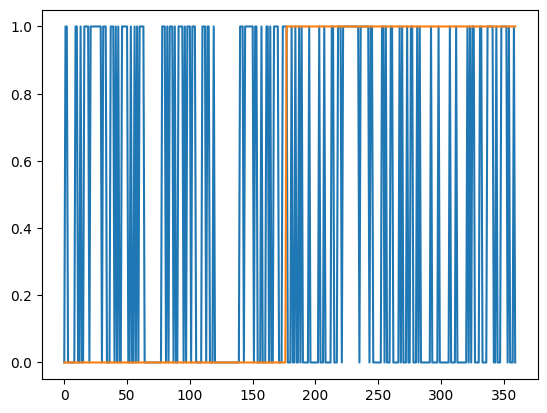

In [13]:
# Your code here
mu1 = np.mean(class1_images, axis=0)
mu2 = np.mean(class2_images, axis=0)
distances_to_mu1 = np.linalg.norm(class_combined_demeaned - mu1, axis=(1, 2))
distances_to_mu2 = np.linalg.norm(class_combined_demeaned - mu2, axis=(1, 2))

# change the line below
class1_estimate = distances_to_mu1 < distances_to_mu2

plt.plot(class1_estimate)
plt.plot(class1_labels)

print("# misclassifications = ",np.sum(class1_estimate != class1_labels))

## Compute mean image and template assuming $\Sigma = {\rm diag}(\sigma)$

# misclassifications =  199


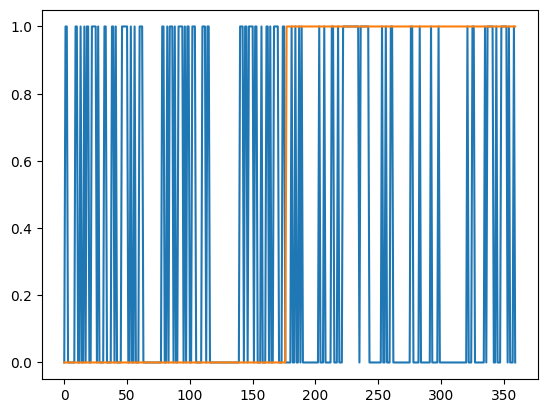

In [16]:
# YOUR CODE HERE
variances = np.var(class_combined_demeaned, axis=0) + 1e-10
distances_to_mu1 = np.sum(((class_combined_demeaned - mu1) ** 2) / variances, axis=(1, 2))
distances_to_mu2 = np.sum(((class_combined_demeaned - mu2) ** 2) / variances, axis=(1, 2))

# change the line below
class1_estimate = distances_to_mu1 < distances_to_mu2


plt.plot(class1_estimate)
plt.plot(class1_labels)

print("# misclassifications = ",np.sum(class1_estimate != class1_labels))